## Постановка задачи:

От нас требуется ознакомиться с выбранным dataset-ом, визуализировать эти данные, вычислить основные характеристики (среднее, разброс, корреляционную матрицу и т.д.), а также, осуществить "препроцессинг" данных и решить задачу классификации.

Классификацию будем проводить по типу отеля: "городской" или "курортный".

Установливаем библиотеку Pandas:

In [172]:
! pip install pandas

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Импортируем необходимые модули:

In [173]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

## Знакомимся с dataset-ом

Считываем dataset и выводим его содержимое, для наглядности, на экран:

In [174]:
data = pd.read_csv('/content/weatherAUS.csv')
data

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145455,2017-06-21,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,...,51.0,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,No,No
145456,2017-06-22,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,...,56.0,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,No,No
145457,2017-06-23,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,...,53.0,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,No,No
145458,2017-06-24,Uluru,7.8,27.0,0.0,NaN,NaN,SE,28.0,SSE,...,51.0,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0,No,No


Выводим первые 10 строк dataset-а:

In [175]:
data.head(10)

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No
5,2008-12-06,Albury,14.6,29.7,0.2,NaN,NaN,WNW,56.0,W,...,55.0,23.0,1009.2,1005.4,NaN,NaN,20.6,28.9,No,No
6,2008-12-07,Albury,14.3,25.0,0.0,NaN,NaN,W,50.0,SW,...,49.0,19.0,1009.6,1008.2,1.0,NaN,18.1,24.6,No,No
7,2008-12-08,Albury,7.7,26.7,0.0,NaN,NaN,W,35.0,SSE,...,48.0,19.0,1013.4,1010.1,NaN,NaN,16.3,25.5,No,No
8,2008-12-09,Albury,9.7,31.9,0.0,NaN,NaN,NNW,80.0,SE,...,42.0,9.0,1008.9,1003.6,NaN,NaN,18.3,30.2,No,Yes
9,2008-12-10,Albury,13.1,30.1,1.4,NaN,NaN,W,28.0,S,...,58.0,27.0,1007.0,1005.7,NaN,NaN,20.1,28.2,Yes,No


Выводим последние 10 строк dataset-а:

In [176]:
data.tail(10)

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
145450,2017-06-16,Uluru,5.2,24.3,0.0,NaN,NaN,E,24.0,SE,...,53.0,24.0,1023.8,1020.0,NaN,NaN,12.3,23.3,No,No
145451,2017-06-17,Uluru,6.4,23.4,0.0,NaN,NaN,ESE,31.0,S,...,53.0,25.0,1025.8,1023.0,NaN,NaN,11.2,23.1,No,No
145452,2017-06-18,Uluru,8.0,20.7,0.0,NaN,NaN,ESE,41.0,SE,...,56.0,32.0,1028.1,1024.3,NaN,7.0,11.6,20.0,No,No
145453,2017-06-19,Uluru,7.4,20.6,0.0,NaN,NaN,E,35.0,ESE,...,63.0,33.0,1027.2,1023.3,NaN,NaN,11.0,20.3,No,No
145454,2017-06-20,Uluru,3.5,21.8,0.0,NaN,NaN,E,31.0,ESE,...,59.0,27.0,1024.7,1021.2,NaN,NaN,9.4,20.9,No,No
145455,2017-06-21,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,...,51.0,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,No,No
145456,2017-06-22,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,...,56.0,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,No,No
145457,2017-06-23,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,...,53.0,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,No,No
145458,2017-06-24,Uluru,7.8,27.0,0.0,NaN,NaN,SE,28.0,SSE,...,51.0,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0,No,No
145459,2017-06-25,Uluru,14.9,NaN,0.0,NaN,NaN,NaN,NaN,ESE,...,62.0,36.0,1020.2,1017.9,8.0,8.0,15.0,20.9,No,NaN


### О наборе данных:

Context
Predict next-day rain by training classification models on the target variable RainTomorrow.

Content
This dataset contains about 10 years of daily weather observations from many locations across Australia.

RainTomorrow is the target variable to predict. It means -- did it rain the next day, Yes or No? This column is Yes if the rain for that day was 1mm or more.

Ознакомимся с некоторыми свойствами Pandas.DataFrame на примере нашего dataset-а:

In [177]:
print(data.shape, end="\n\n")
print(data.columns, end="\n\n")
print(data.index, end="\n\n")
print(data.at[2, 'Location'], end="\n\n")
print(data["Location"][2], end="\n\n")
print(data["Location"].dtype, end="\n\n")
print(type(data["Location"]), end="\n\n")
print(type(data["Location"][2]), end="\n\n")

(145460, 23)

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow'],
      dtype='object')

RangeIndex(start=0, stop=145460, step=1)

Albury

Albury

object

<class 'pandas.core.series.Series'>

<class 'str'>



Выведем описательную статистику по нашему dataset-у:

In [178]:
data.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,143975.000000,144199.000000,142199.000000,82670.000000,75625.000000,135197.000000,143693.000000,142398.000000,142806.000000,140953.000000,130395.00000,130432.000000,89572.000000,86102.000000,143693.000000,141851.00000
mean,12.194034,23.221348,2.360918,5.468232,7.611178,40.035230,14.043426,18.662657,68.880831,51.539116,1017.64994,1015.255889,4.447461,4.509930,16.990631,21.68339
std,6.398495,7.119049,8.478060,4.193704,3.785483,13.607062,8.915375,8.809800,19.029164,20.795902,7.10653,7.037414,2.887159,2.720357,6.488753,6.93665
min,-8.500000,-4.800000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.50000,977.100000,0.000000,0.000000,-7.200000,-5.40000
25%,7.600000,17.900000,0.000000,2.600000,4.800000,31.000000,7.000000,13.000000,57.000000,37.000000,1012.90000,1010.400000,1.000000,2.000000,12.300000,16.60000
50%,12.000000,22.600000,0.000000,4.800000,8.400000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.60000,1015.200000,5.000000,5.000000,16.700000,21.10000
75%,16.900000,28.200000,0.800000,7.400000,10.600000,48.000000,19.000000,24.000000,83.000000,66.000000,1022.40000,1020.000000,7.000000,7.000000,21.600000,26.40000
max,33.900000,48.100000,371.000000,145.000000,14.500000,135.000000,130.000000,87.000000,100.000000,100.000000,1041.00000,1039.600000,9.000000,9.000000,40.200000,46.70000


In [179]:
data.describe(include = ['object'])

,Date,Location,WindGustDir,WindDir9am,WindDir3pm,RainToday,RainTomorrow
count,145460,145460,135134,134894,141232,142199,142193
unique,3436,49,16,16,16,2,2
top,2013-11-12,Canberra,W,N,SE,No,No
freq,49,3436,9915,11758,10838,110319,110316


In [180]:
data.describe(include = 'all')

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
count,145460,145460,143975.000000,144199.000000,142199.000000,82670.000000,75625.000000,135134,135197.000000,134894,...,142806.000000,140953.000000,130395.00000,130432.000000,89572.000000,86102.000000,143693.000000,141851.00000,142199,142193
unique,3436,49,NaN,NaN,NaN,NaN,NaN,16,NaN,16,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,2
top,2013-11-12,Canberra,NaN,NaN,NaN,NaN,NaN,W,NaN,N,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No,No
freq,49,3436,NaN,NaN,NaN,NaN,NaN,9915,NaN,11758,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,110319,110316
mean,NaN,NaN,12.194034,23.221348,2.360918,5.468232,7.611178,NaN,40.035230,NaN,...,68.880831,51.539116,1017.64994,1015.255889,4.447461,4.509930,16.990631,21.68339,NaN,NaN
std,NaN,NaN,6.398495,7.119049,8.478060,4.193704,3.785483,NaN,13.607062,NaN,...,19.029164,20.795902,7.10653,7.037414,2.887159,2.720357,6.488753,6.93665,NaN,NaN
min,NaN,NaN,-8.500000,-4.800000,0.000000,0.000000,0.000000,NaN,6.000000,NaN,...,0.000000,0.000000,980.50000,977.100000,0.000000,0.000000,-7.200000,-5.40000,NaN,NaN
25%,NaN,NaN,7.600000,17.900000,0.000000,2.600000,4.800000,NaN,31.000000,NaN,...,57.000000,37.000000,1012.90000,1010.400000,1.000000,2.000000,12.300000,16.60000,NaN,NaN
50%,NaN,NaN,12.000000,22.600000,0.000000,4.800000,8.400000,NaN,39.000000,NaN,...,70.000000,52.000000,1017.60000,1015.200000,5.000000,5.000000,16.700000,21.10000,NaN,NaN
75%,NaN,NaN,16.900000,28.200000,0.800000,7.400000,10.600000,NaN,48.000000,NaN,...,83.000000,66.000000,1022.40000,1020.000000,7.000000,7.000000,21.600000,26.40000,NaN,NaN


Выведем матрицу графиков рессеивания (запускать на свой стах и риск):

In [181]:
#from pandas.plotting import scatter_matrix
#scatter_matrix(data, alpha = .01, figsize = (10, 10))
#pass

Выведем матрицу корреляции наших численных признаков:

In [182]:
data.corr()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
MinTemp,1.000000,0.736555,0.103938,0.466993,0.072586,0.177415,0.175064,0.175173,-0.232899,0.006089,-0.450970,-0.461292,0.078754,0.021605,0.901821,0.708906
MaxTemp,0.736555,1.000000,-0.074992,0.587932,0.470156,0.067615,0.014450,0.050300,-0.504110,-0.508855,-0.332061,-0.427167,-0.289370,-0.277921,0.887210,0.984503
Rainfall,0.103938,-0.074992,1.000000,-0.064351,-0.227549,0.133659,0.087338,0.057887,0.224405,0.255755,-0.168154,-0.126534,0.198528,0.172403,0.011192,-0.079657
Evaporation,0.466993,0.587932,-0.064351,1.000000,0.365602,0.203021,0.193084,0.129400,-0.504092,-0.390243,-0.270362,-0.293581,-0.183793,-0.182618,0.545115,0.572893
Sunshine,0.072586,0.470156,-0.227549,0.365602,1.000000,-0.034750,0.005499,0.053834,-0.490819,-0.629130,0.041970,-0.019719,-0.675323,-0.703930,0.291188,0.490501
WindGustSpeed,0.177415,0.067615,0.133659,0.203021,-0.034750,1.000000,0.605303,0.686307,-0.215070,-0.026327,-0.458744,-0.413749,0.071736,0.109168,0.150150,0.032748
WindSpeed9am,0.175064,0.014450,0.087338,0.193084,0.005499,0.605303,1.000000,0.519547,-0.270858,-0.031614,-0.228743,-0.175817,0.025112,0.054639,0.128545,0.004569
WindSpeed3pm,0.175173,0.050300,0.057887,0.129400,0.053834,0.686307,0.519547,1.000000,-0.145525,0.016432,-0.296351,-0.255439,0.053337,0.025396,0.163030,0.027778
Humidity9am,-0.232899,-0.504110,0.224405,-0.504092,-0.490819,-0.215070,-0.270858,-0.145525,1.000000,0.666949,0.139442,0.186858,0.452297,0.357326,-0.471354,-0.498399
Humidity3pm,0.006089,-0.508855,0.255755,-0.390243,-0.629130,-0.026327,-0.031614,0.016432,0.666949,1.000000,-0.027544,0.051997,0.517120,0.523120,-0.221019,-0.557841


По данной матрице можно сделать вывод, что в общей массе корреляция между признаками достаточно мала (исключение составляют, например, признаки `stays_in_week_nights` и `stays_in_weekend_nights`).

Визуализируем данную матрицу корреляции:

In [183]:
import sys
!{sys.executable} -m pip install seaborn
import seaborn as sns

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


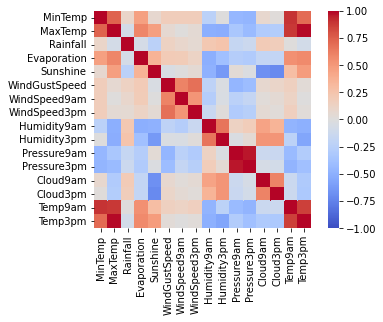

In [184]:
corr_mat = data.corr()
sns.heatmap(corr_mat, square=True, fmt='.2f', vmin=-1, vmax=1, cmap='coolwarm')

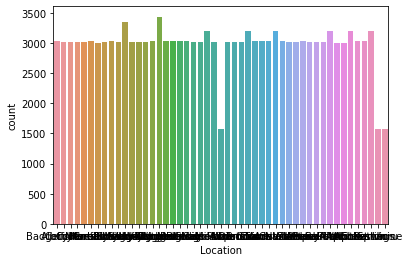

In [185]:
sns.countplot(x='Location', data=data)

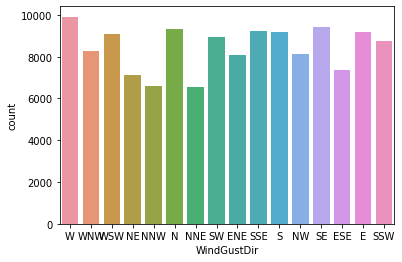

In [186]:
sns.countplot(x='WindGustDir', data=data)

Визуализируем некоторые графики корреляции:

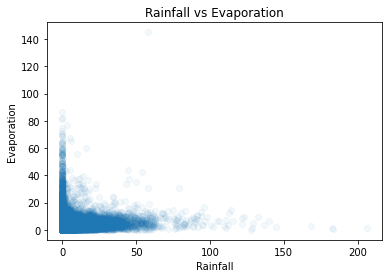

In [187]:
plt.plot(data['Rainfall'], data['Evaporation'], 'o', alpha = 0.05)
plt.xlabel('Rainfall')
plt.ylabel('Evaporation')
plt.title('Rainfall vs Evaporation')
pass

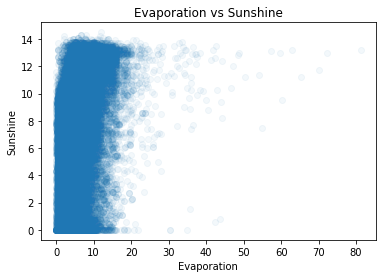

In [188]:
plt.plot(data['Evaporation'], data['Sunshine'], 'o', alpha = 0.05)
plt.xlabel('Evaporation')
plt.ylabel('Sunshine')
plt.title('Evaporation vs Sunshine')
pass

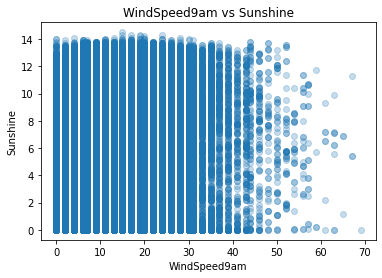

In [189]:
plt.plot(data['WindSpeed9am'], data['Sunshine'], 'o', alpha = 0.25)
plt.xlabel('WindSpeed9am')
plt.ylabel('Sunshine')
plt.title('WindSpeed9am vs Sunshine')
pass

Выведем уникальные значения для некоторых нечисловых признаков:

In [190]:
data['Location'].unique()

array(['Albury', 'BadgerysCreek', 'Cobar', 'CoffsHarbour', 'Moree',
       'Newcastle', 'NorahHead', 'NorfolkIsland', 'Penrith', 'Richmond',
       'Sydney', 'SydneyAirport', 'WaggaWagga', 'Williamtown',
       'Wollongong', 'Canberra', 'Tuggeranong', 'MountGinini', 'Ballarat',
       'Bendigo', 'Sale', 'MelbourneAirport', 'Melbourne', 'Mildura',
       'Nhil', 'Portland', 'Watsonia', 'Dartmoor', 'Brisbane', 'Cairns',
       'GoldCoast', 'Townsville', 'Adelaide', 'MountGambier', 'Nuriootpa',
       'Woomera', 'Albany', 'Witchcliffe', 'PearceRAAF', 'PerthAirport',
       'Perth', 'SalmonGums', 'Walpole', 'Hobart', 'Launceston',
       'AliceSprings', 'Darwin', 'Katherine', 'Uluru'], dtype=object)

In [191]:
data['WindGustDir'].unique()

array(['W', 'WNW', 'WSW', 'NE', 'NNW', 'N', 'NNE', 'SW', nan, 'ENE',
       'SSE', 'S', 'NW', 'SE', 'ESE', 'E', 'SSW'], dtype=object)

In [192]:
data['WindDir9am'].unique()

array(['W', 'NNW', 'SE', 'ENE', 'SW', 'SSE', 'S', 'NE', nan, 'SSW', 'N',
       'WSW', 'ESE', 'E', 'NW', 'WNW', 'NNE'], dtype=object)

## Готовим данные

In [193]:
data.isna().sum()

Date                 0
Location             0
MinTemp           1485
MaxTemp           1261
Rainfall          3261
Evaporation      62790
Sunshine         69835
WindGustDir      10326
WindGustSpeed    10263
WindDir9am       10566
WindDir3pm        4228
WindSpeed9am      1767
WindSpeed3pm      3062
Humidity9am       2654
Humidity3pm       4507
Pressure9am      15065
Pressure3pm      15028
Cloud9am         55888
Cloud3pm         59358
Temp9am           1767
Temp3pm           3609
RainToday         3261
RainTomorrow      3267
dtype: int64

Рассортируем категориальные и численные признаки:

In [194]:
categorical_columns = [c for c in data.columns if data[c].dtype.name == 'object']
numerical_columns   = [c for c in data.columns if data[c].dtype.name != 'object']
print(categorical_columns)
print(numerical_columns)

['Date', 'Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday', 'RainTomorrow']
['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm']


In [195]:
median = data.median(axis = 0, numeric_only=True)
data_med = data.fillna(median, axis=0)
data_med[numerical_columns].count(axis = 0)

MinTemp          145460
MaxTemp          145460
Rainfall         145460
Evaporation      145460
Sunshine         145460
WindGustSpeed    145460
WindSpeed9am     145460
WindSpeed3pm     145460
Humidity9am      145460
Humidity3pm      145460
Pressure9am      145460
Pressure3pm      145460
Cloud9am         145460
Cloud3pm         145460
Temp9am          145460
Temp3pm          145460
dtype: int64

In [196]:
data_med[categorical_columns].count(axis = 0)

Date            145460
Location        145460
WindGustDir     135134
WindDir9am      134894
WindDir3pm      141232
RainToday       142199
RainTomorrow    142193
dtype: int64

In [197]:
data_med.isna().sum()

Date                 0
Location             0
MinTemp              0
MaxTemp              0
Rainfall             0
Evaporation          0
Sunshine             0
WindGustDir      10326
WindGustSpeed        0
WindDir9am       10566
WindDir3pm        4228
WindSpeed9am         0
WindSpeed3pm         0
Humidity9am          0
Humidity3pm          0
Pressure9am          0
Pressure3pm          0
Cloud9am             0
Cloud3pm             0
Temp9am              0
Temp3pm              0
RainToday         3261
RainTomorrow      3267
dtype: int64

Выведем все уникальные значения для каждого категориального признака:

In [198]:
for c in categorical_columns:
    print(f"{c}: {data[c].unique()}")

Date: ['2008-12-01' '2008-12-02' '2008-12-03' ... '2008-01-29' '2008-01-30'
 '2008-01-31']
Location: ['Albury' 'BadgerysCreek' 'Cobar' 'CoffsHarbour' 'Moree' 'Newcastle'
 'NorahHead' 'NorfolkIsland' 'Penrith' 'Richmond' 'Sydney' 'SydneyAirport'
 'WaggaWagga' 'Williamtown' 'Wollongong' 'Canberra' 'Tuggeranong'
 'MountGinini' 'Ballarat' 'Bendigo' 'Sale' 'MelbourneAirport' 'Melbourne'
 'Mildura' 'Nhil' 'Portland' 'Watsonia' 'Dartmoor' 'Brisbane' 'Cairns'
 'GoldCoast' 'Townsville' 'Adelaide' 'MountGambier' 'Nuriootpa' 'Woomera'
 'Albany' 'Witchcliffe' 'PearceRAAF' 'PerthAirport' 'Perth' 'SalmonGums'
 'Walpole' 'Hobart' 'Launceston' 'AliceSprings' 'Darwin' 'Katherine'
 'Uluru']
WindGustDir: ['W' 'WNW' 'WSW' 'NE' 'NNW' 'N' 'NNE' 'SW' nan 'ENE' 'SSE' 'S' 'NW' 'SE'
 'ESE' 'E' 'SSW']
WindDir9am: ['W' 'NNW' 'SE' 'ENE' 'SW' 'SSE' 'S' 'NE' nan 'SSW' 'N' 'WSW' 'ESE' 'E'
 'NW' 'WNW' 'NNE']
WindDir3pm: ['WNW' 'WSW' 'E' 'NW' 'W' 'SSE' 'ESE' 'ENE' 'NNW' 'SSW' 'SW' 'SE' 'N' 'S'
 'NNE' nan 'NE']
RainToda

In [199]:
data_med.dropna(axis=0, how="all", subset=['WindGustDir'], inplace=True)
data_med.dropna(axis=0, how="all", subset=['WindDir9am'], inplace=True)
data_med.dropna(axis=0, how="all", subset=['WindDir3pm'], inplace=True)
data_med.dropna(axis=0, how="all", subset=['RainToday'], inplace=True)
data_med.dropna(axis=0, how="all", subset=['RainTomorrow'], inplace=True)

Убедимся в корректности проделанных действий:

In [200]:
data_med[numerical_columns].count(axis = 0)

MinTemp          123710
MaxTemp          123710
Rainfall         123710
Evaporation      123710
Sunshine         123710
WindGustSpeed    123710
WindSpeed9am     123710
WindSpeed3pm     123710
Humidity9am      123710
Humidity3pm      123710
Pressure9am      123710
Pressure3pm      123710
Cloud9am         123710
Cloud3pm         123710
Temp9am          123710
Temp3pm          123710
dtype: int64

In [201]:
data_med[categorical_columns].count(axis = 0)

Date            123710
Location        123710
WindGustDir     123710
WindDir9am      123710
WindDir3pm      123710
RainToday       123710
RainTomorrow    123710
dtype: int64

Как видим, пропущенных значений больше не осталось

In [202]:
data_med["Sunshine"].describe()

count    123710.000000
mean          8.030365
std           2.802409
min           0.000000
25%           8.200000
50%           8.400000
75%           9.000000
max          14.500000
Name: Sunshine, dtype: float64

In [203]:
data_med["Location"].describe()

count     123710
unique        47
top       Darwin
freq        3119
Name: Location, dtype: object

In [204]:
data_med["WindGustDir"].describe()

count     123710
unique        16
top            W
freq        9177
Name: WindGustDir, dtype: object

Разделим категориальные признаки на бинарные и небинарные:

In [205]:
binary_columns    = [c for c in categorical_columns if data_med.describe(include = [object])[c]['unique'] == 2]
nonbinary_columns = [c for c in categorical_columns if data_med.describe(include = [object])[c]['unique'] > 2]
print(binary_columns, nonbinary_columns)

['RainToday', 'RainTomorrow'] ['Date', 'Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm']


Для бинарного признака заменим значения на 0 и 1:

In [206]:
data_med.loc[data_med['RainToday'] == 'Yes', 'RainToday'] = 1
data_med.loc[data_med['RainToday'] == 'No', 'RainToday'] = 0

In [207]:
data_med.loc[data_med['RainTomorrow'] == 'Yes', 'RainTomorrow'] = 1
data_med.loc[data_med['RainTomorrow'] == 'No', 'RainTomorrow'] = 0

Проверим результат:

In [208]:
data_med['RainToday'].describe()

count     123710
unique         2
top            0
freq       95954
Name: RainToday, dtype: int64

Как можно заметить, у нас есть 4 категориальных признака, которые обладают большим количеством уникальных значей (`name`, `email`, `phone-number`, `credit_card`). Их векторизация - занятие сомнительное, поэтому просто уберем их из нашего dataset-а:

In [209]:
data_med = data_med.drop(labels=["Date"], axis=1)
data_med



,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,Albury,13.4,22.9,0.6,4.8,8.4,W,44.0,W,WNW,...,71.0,22.0,1007.7,1007.1,8.0,5.0,16.9,21.8,0,0
1,Albury,7.4,25.1,0.0,4.8,8.4,WNW,44.0,NNW,WSW,...,44.0,25.0,1010.6,1007.8,5.0,5.0,17.2,24.3,0,0
2,Albury,12.9,25.7,0.0,4.8,8.4,WSW,46.0,W,WSW,...,38.0,30.0,1007.6,1008.7,5.0,2.0,21.0,23.2,0,0
3,Albury,9.2,28.0,0.0,4.8,8.4,NE,24.0,SE,E,...,45.0,16.0,1017.6,1012.8,5.0,5.0,18.1,26.5,0,0
4,Albury,17.5,32.3,1.0,4.8,8.4,W,41.0,ENE,NW,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145454,Uluru,3.5,21.8,0.0,4.8,8.4,E,31.0,ESE,E,...,59.0,27.0,1024.7,1021.2,5.0,5.0,9.4,20.9,0,0
145455,Uluru,2.8,23.4,0.0,4.8,8.4,E,31.0,SE,ENE,...,51.0,24.0,1024.6,1020.3,5.0,5.0,10.1,22.4,0,0
145456,Uluru,3.6,25.3,0.0,4.8,8.4,NNW,22.0,SE,N,...,56.0,21.0,1023.5,1019.1,5.0,5.0,10.9,24.5,0,0
145457,Uluru,5.4,26.9,0.0,4.8,8.4,N,37.0,SE,WNW,...,53.0,24.0,1021.0,1016.8,5.0,5.0,12.5,26.1,0,0


In [210]:
nonbinary_columns.remove("Date")
nonbinary_columns


['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm']

К небинарным признакам применим метод векторизации:

In [211]:
data_nonbinary = pd.get_dummies(data_med[nonbinary_columns])
data_nonbinary

,Location_Adelaide,Location_Albury,Location_AliceSprings,Location_BadgerysCreek,Location_Ballarat,Location_Bendigo,Location_Brisbane,Location_Cairns,Location_Canberra,Location_Cobar,...,WindDir3pm_NNW,WindDir3pm_NW,WindDir3pm_S,WindDir3pm_SE,WindDir3pm_SSE,WindDir3pm_SSW,WindDir3pm_SW,WindDir3pm_W,WindDir3pm_WNW,WindDir3pm_WSW
0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,1,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145454,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
145455,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
145456,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
145457,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


Нормализуем количественные признаки (это полезно, т.к. мы будем использовать, в том числе, метод ближайших соседей):

In [212]:
data_numerical = data_med[numerical_columns]
data_numerical = (data_numerical - data_numerical.mean(axis = 0))/data_numerical.std(axis = 0)
data_numerical.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,1.237100e+05,1.237100e+05,1.237100e+05,1.237100e+05,1.237100e+05,1.237100e+05,1.237100e+05,1.237100e+05,1.237100e+05,1.237100e+05,1.237100e+05,1.237100e+05,1.237100e+05,1.237100e+05,1.237100e+05,1.237100e+05
mean,-5.578200e-16,5.366835e-16,-3.859710e-17,2.526042e-16,-4.555836e-16,4.726996e-17,-8.408654e-17,-1.493340e-17,2.573140e-17,-1.323329e-16,-1.525774e-14,-7.417535e-15,1.180887e-16,1.317586e-16,1.020066e-16,-2.113651e-16
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-3.284818e+00,-3.923802e+00,-2.785706e-01,-1.614494e+00,-2.865522e+00,-2.515961e+00,-1.566299e+00,-2.003792e+00,-3.566199e+00,-2.440644e+00,-5.456006e+00,-5.657389e+00,-2.013578e+00,-2.192235e+00,-3.777138e+00,-3.895437e+00
25%,-7.246618e-01,-7.458569e-01,-2.785706e-01,-3.297728e-01,6.053200e-02,-7.233956e-01,-7.236647e-01,-7.204001e-01,-6.151586e-01,-7.131816e-01,-6.227149e-01,-6.452275e-01,-7.085666e-01,-3.224061e-01,-7.360454e-01,-7.267854e-01
50%,-3.357665e-02,-6.586001e-02,-2.785706e-01,-1.462412e-01,1.318992e-01,-1.258739e-01,-2.421596e-01,-2.036832e-02,6.990434e-02,5.457948e-02,2.763625e-02,2.604417e-02,1.614413e-01,1.450512e-01,-5.681661e-02,-8.449113e-02
75%,7.203344e-01,7.112793e-01,-1.847624e-01,9.846753e-02,3.460006e-01,5.463380e-01,6.004744e-01,5.629915e-01,7.022702e-01,6.783854e-01,6.336453e-01,6.376472e-01,5.964452e-01,6.125085e-01,7.150343e-01,6.862620e-01
max,3.374730e+00,3.417389e+00,4.282630e+01,2.475287e+01,2.308598e+00,7.044386e+00,8.665685e+00,7.913325e+00,1.703516e+00,2.357863e+00,3.486322e+00,3.665828e+00,1.901457e+00,2.014880e+00,3.540009e+00,3.540903e+00


Cоеднияем все данные:

In [213]:
data_med = pd.concat((data_numerical, data_nonbinary, data_med[binary_columns]), axis = 1)
data_med.describe(include="all")

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,...,WindDir3pm_S,WindDir3pm_SE,WindDir3pm_SSE,WindDir3pm_SSW,WindDir3pm_SW,WindDir3pm_W,WindDir3pm_WNW,WindDir3pm_WSW,RainToday,RainTomorrow
count,1.237100e+05,1.237100e+05,1.237100e+05,1.237100e+05,1.237100e+05,1.237100e+05,1.237100e+05,1.237100e+05,1.237100e+05,1.237100e+05,...,123710.000000,123710.000000,123710.000000,123710.000000,123710.000000,123710.000000,123710.000000,123710.000000,123710.0,123710.0
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,2.0
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,95954.0,96318.0
mean,-5.578200e-16,5.366835e-16,-3.859710e-17,2.526042e-16,-4.555836e-16,4.726996e-17,-8.408654e-17,-1.493340e-17,2.573140e-17,-1.323329e-16,...,0.070795,0.072387,0.067933,0.059041,0.066341,0.072589,0.063908,0.067771,NaN,NaN
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,...,0.256482,0.259129,0.251632,0.235703,0.248878,0.259462,0.244589,0.251354,NaN,NaN
min,-3.284818e+00,-3.923802e+00,-2.785706e-01,-1.614494e+00,-2.865522e+00,-2.515961e+00,-1.566299e+00,-2.003792e+00,-3.566199e+00,-2.440644e+00,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN
25%,-7.246618e-01,-7.458569e-01,-2.785706e-01,-3.297728e-01,6.053200e-02,-7.233956e-01,-7.236647e-01,-7.204001e-01,-6.151586e-01,-7.131816e-01,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN
50%,-3.357665e-02,-6.586001e-02,-2.785706e-01,-1.462412e-01,1.318992e-01,-1.258739e-01,-2.421596e-01,-2.036832e-02,6.990434e-02,5.457948e-02,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN
75%,7.203344e-01,7.112793e-01,-1.847624e-01,9.846753e-02,3.460006e-01,5.463380e-01,6.004744e-01,5.629915e-01,7.022702e-01,6.783854e-01,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN


In [222]:
data_med.head(10)

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,...,WindDir3pm_S,WindDir3pm_SE,WindDir3pm_SSE,WindDir3pm_SSW,WindDir3pm_SW,WindDir3pm_W,WindDir3pm_WNW,WindDir3pm_WSW,RainToday,RainTomorrow
0,0.154901,-0.079738,-0.208214,-0.146241,0.131899,0.247577,0.600474,0.562992,0.175299,-1.384973,...,0,0,0,0,0,0,1,0,0,0
1,-0.787488,0.225567,-0.278571,-0.146241,0.131899,0.247577,-1.325546,0.329648,-1.247524,-1.241017,...,0,0,0,0,0,0,0,1,0,0
2,0.076369,0.308832,-0.278571,-0.146241,0.131899,0.396958,0.480098,0.796335,-1.563707,-1.001092,...,0,0,0,0,0,0,0,1,0,0
3,-0.504771,0.628014,-0.278571,-0.146241,0.131899,-1.246227,-0.482912,-1.187088,-1.194827,-1.672883,...,0,0,0,0,0,0,0,0,0,0
4,0.798867,1.224746,-0.161310,-0.146241,0.131899,0.023506,-0.964417,0.096304,0.754967,-0.857137,...,0,0,0,0,0,0,0,0,0,0
5,0.343379,0.863932,-0.255119,-0.146241,0.131899,1.143860,0.480098,0.562992,-0.667856,-1.336988,...,0,0,0,0,0,1,0,0,0,0
6,0.296259,0.211690,-0.278571,-0.146241,0.131899,0.695718,0.600474,0.562992,-0.984039,-1.528928,...,0,0,0,0,0,1,0,0,0,0
7,-0.740368,0.447607,-0.278571,-0.146241,0.131899,-0.424635,-1.084794,-0.253712,-1.036736,-1.528928,...,0,0,0,0,0,1,0,0,0,0
8,-0.426239,1.169236,-0.278571,-0.146241,0.131899,2.936425,-0.964417,1.029679,-1.352919,-2.008779,...,0,0,0,0,0,0,0,0,0,1
9,0.107782,0.919442,-0.114406,-0.146241,0.131899,-0.947466,-0.001407,-0.953744,-0.509764,-1.145047,...,0,0,1,0,0,0,0,0,1,0


Разбиваем наши данные на y и x:

In [215]:
X = data_med.drop('RainToday', axis = 1)
y = data_med['RainToday']
feature_names = X.columns
print(feature_names)

Index(['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
       'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am',
       'Humidity3pm',
       ...
       'WindDir3pm_NW', 'WindDir3pm_S', 'WindDir3pm_SE', 'WindDir3pm_SSE',
       'WindDir3pm_SSW', 'WindDir3pm_SW', 'WindDir3pm_W', 'WindDir3pm_WNW',
       'WindDir3pm_WSW', 'RainTomorrow'],
      dtype='object', length=112)


In [216]:
X=X.to_numpy()
y=y.to_numpy()

In [217]:
print(X, end="\n\n")
print(y, end="\n\n")
print(X.shape, end="\n\n")
print(y.shape, end="\n\n")
N, d = X.shape

[[0.15490111958456196 -0.07973750124847398 -0.2082144288950415 ... 1 0 0]
 [-0.7874877260509514 0.2255672238176444 -0.2785705779714314 ... 0 1 0]
 [0.0763687157816025 0.3088321488356763 -0.2785705779714314 ... 0 1 0]
 ...
 [-1.3843339949534432 0.25332219882365503 -0.2785705779714314 ... 0 0 0]
 [-1.1016173412627892 0.4753619988717406 -0.2785705779714314 ... 1 0 0]
 [-0.724661803008584 0.4892394863747461 -0.2785705779714314 ... 0 0 0]]

[0 0 0 ... 0 0 0]

(123710, 112)

(123710,)



Разделим наш dataset на обучающую и тестовую выборку:

In [218]:
import sys
!{sys.executable} -m pip install scikit-learn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [219]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 7)

N_train, _ = X_train.shape 
N_test,  _ = X_test.shape 

N2_train = y_train.shape 
N2_test = y_test.shape 

print(N_train, N_test, N2_train, N2_test)

86597 37113 (86597,) (37113,)


Интерпретируем все значения `y` как целые числа:

In [223]:
y_test = y_test.astype("int")
y_train = y_train.astype("int")

## Обучение

Попробуем обучить нашу модель с помощью метода `kNN`:

In [224]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 10)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=10)

In [225]:
y_test_predict = knn.predict(X_test)
y_train_predict = knn.predict(X_train)
err_test  = np.mean(y_test  != y_test_predict)
err_train  = np.mean(y_train != y_train_predict)

In [226]:
print(f"{err_train}")
print(f"{err_test}")

0.1128099125835768
0.1300622423409587


In [227]:
from sklearn.metrics import confusion_matrix

print(confusion_matrix(y_train, y_train_predict), end="\n\n")
print(confusion_matrix(y_test, y_test_predict), end="\n\n")

[[66444   779]
 [ 8990 10384]]

[[28194   537]
 [ 4290  4092]]



Попробуем теперь подобрать параметры так, чтобы еще сильнее уменьшить ошибку (работает очень медленно):

In [ ]:
#from sklearn.model_selection import GridSearchCV
#nnb = [1, 3, 5, 10, 15, 20, 25, 35, 45, 55]
#knn = KNeighborsClassifier()
#grid = GridSearchCV(knn, param_grid = {'n_neighbors': nnb}, cv=10)
#grid.fit(X_train, y_train)

#best_cv_err = 1 - grid.best_score_
#best_n_neighbors = grid.best_estimator_.n_neighbors
#print(best_cv_err, best_n_neighbors)

Лучший результат достигается при n=3:

In [228]:
knn = KNeighborsClassifier(n_neighbors = 3).fit(X_train, y_train)

err_train = np.mean(y_train != knn.predict(X_train))
err_test  = np.mean(y_test  != knn.predict(X_test))

print(f"{err_train}")
print(f"{err_test}")

0.07805120269755303
0.13771454746315306


## Другие алгоритмы обучения:

### SVC (работает очень, очень медленно):

In [ ]:
from sklearn.svm import SVC
svc = SVC(gamma='auto')
svc.fit(X_train, y_train)

err_train = np.mean(y_train != svc.predict(X_train))
err_test  = np.mean(y_test  != svc.predict(X_test))

print(f"{err_train}")
print(f"{err_test}")

err_train=0.07982243068933746
err_test=0.0785939637602256


### Random Forest:

In [ ]:
from sklearn import ensemble
rf = ensemble.RandomForestClassifier(n_estimators = 1000)
rf.fit(X_train, y_train)

err_train = np.mean(y_train != rf.predict(X_train))
err_test  = np.mean(y_test  != rf.predict(X_test))

print(f"{err_train}")
print(f"{err_test}")

err_train=0.0
err_test=0.013094340676215205


### Extremely Randomized Trees:

In [ ]:
ert = ensemble.ExtraTreesClassifier(n_estimators = 100).fit(X_train, y_train)

err_train = np.mean(y_train != ert.predict(X_train))
err_test  = np.mean(y_test  != ert.predict(X_test))

print(f"{err_train}")
print(f"{err_test}")

err_train=0.0
err_test=0.01831532512494067


### AdaBoost (работает очень медленно):

In [ ]:
ada = ensemble.AdaBoostClassifier(n_estimators = 1000)
ada.fit(X_train, y_train)

err_train = np.mean(y_train != ada.predict(X_train))
err_test = np.mean(y_test != ada.predict(X_test))

print(f"{err_train}")
print(f"{err_test}")

err_train=0.0197791152644993
err_test=0.02331295195019125


### GBT (работает очень, очень медленно):

In [ ]:
gbt = ensemble.GradientBoostingClassifier(n_estimators = 1000)
gbt.fit(X_train, y_train)

err_train = np.mean(y_train != gbt.predict(X_train))
err_test = np.mean(y_test != gbt.predict(X_test))

print(f"{err_train}")
print(f"{err_test}")

err_train=0.00929726107714214
err_test=0.013094340676215205


Наилуший результат показывает Random Forest и GBT. Ошибка на тестовой выборке состовляет ~ 0.013. При этом, на обучение алгоритмом Random Forest затрачивается намного меньше вермени.

Во всех случаях ошибка на тестовой выборке оказывалась больше, чем на тренировочной, что может свидетельствовать о некотором переобучении модели.

Подводя итог, можно сделать вывод, что "предобработка" данных была выполнена успешно и задача классификации решена.
